## POS tagging using modified Viterbi

### Data Preparation

In [1]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [2]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

# Load Sample test file

In [3]:
## Load Sample test file
file = open("Test_sentences.txt", "r") 
ltext=[]
for line in file:
    ltext.append(word_tokenize(line.strip()))

sample_words = [word for sent in ltext for word in sent] 

In [4]:
sample_words[:10]

['Android',
 'is',
 'a',
 'mobile',
 'operating',
 'system',
 'developed',
 'by',
 'Google',
 '.']

In [5]:
nltk_data[:5]

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

###### Exploring Corpus

In [6]:
# Total Sentance
print(len(nltk_data))

3914


In [7]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(nltk_data,test_size=0.05)

print(len(train_set))
print(len(test_set))
print(train_set[:10])

3718
196
[[('You', 'PRON'), ('have', 'VERB'), ('a', 'DET'), ('right', 'NOUN'), ('*-2', 'X'), ('to', 'PRT'), ('read', 'VERB'), ('Voice', 'NOUN'), ('of', 'ADP'), ('America', 'NOUN'), ('scripts', 'NOUN'), ('if', 'ADP'), ('you', 'PRON'), ('do', 'VERB'), ("n't", 'ADV'), ('mind', 'VERB'), ('*-1', 'X'), ('traveling', 'VERB'), ('to', 'PRT'), ('Washington', 'NOUN'), ('every', 'DET'), ('week', 'NOUN'), ('or', 'CONJ'), ('so', 'ADV'), ('and', 'CONJ'), ('*-1', 'X'), ('visiting', 'VERB'), ('the', 'DET'), ('Voice', 'NOUN'), ('office', 'NOUN'), ('during', 'ADP'), ('business', 'NOUN'), ('hours', 'NOUN'), ('.', '.')], [('Some', 'DET'), ('researchers', 'NOUN'), ('have', 'VERB'), ('charged', 'VERB'), ('that', 'ADP'), ('the', 'DET'), ('administration', 'NOUN'), ('is', 'VERB'), ('imposing', 'VERB'), ('new', 'ADJ'), ('ideological', 'ADJ'), ('tests', 'NOUN'), ('for', 'ADP'), ('top', 'ADJ'), ('scientific', 'ADJ'), ('posts', 'NOUN'), ('.', '.')], [('For', 'ADP'), ('stock', 'NOUN'), ('indexes', 'NOUN'), (',', '.

In [8]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

95710

In [9]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['You', 'have', 'a', 'right', '*-2', 'to', 'read', 'Voice', 'of', 'America']

In [10]:
# vocabulary
V = set(tokens)
print(len(V))

12055


In [11]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

12

In [12]:
# Tags
print(T)

{'DET', 'ADV', 'VERB', 'ADJ', 'PRT', 'NUM', 'CONJ', 'ADP', 'PRON', 'NOUN', '.', 'X'}


In [13]:
# Getting list of Test set words
test_words = set([tup[0] for sent in test_set for tup in sent])
len(test_words)

1918

In [14]:
test_words

{'Kent',
 'getting',
 'chrysotile',
 'negative',
 'viewing',
 'maker',
 'part',
 'hired',
 'anywhere',
 'month',
 'remaining',
 'tax',
 'flux',
 'cataract',
 'Fewer',
 'Section',
 'good',
 '1991',
 'No',
 'erasures',
 'College',
 'sweet',
 'acquired',
 'connection',
 'A.',
 'hotel',
 'caused',
 'exporter',
 'Generally',
 'laws',
 'itself',
 'tasty',
 'wine-making',
 'finance',
 'academic',
 'Calder',
 'London-based',
 'keep',
 'Ill.',
 'slightly',
 'introduced',
 'gain',
 'Now',
 'increases',
 'symbolic',
 'around',
 'production',
 'plus',
 'hear',
 'despite',
 'answers',
 'Princeton',
 'Jennison',
 'findings',
 'Asia',
 'Nissan',
 'encounter',
 'ovation',
 'exporters',
 'needed',
 'trying',
 'NASD',
 'legal',
 'ceiling',
 'Among',
 'sexy',
 'Typical',
 'general',
 'executives',
 'partners',
 'stocks',
 'invests',
 'surprise',
 'electrical-safety',
 'closed',
 'illness',
 '-RCB-',
 'Publishing',
 'each',
 'cited',
 'collecting',
 'joins',
 'Wall',
 'he',
 'understand',
 'Yet',
 'Progra

In [15]:
# Getting list of unknown words
Unknowns_words = test_words.difference(set(tokens))

In [16]:
len(list(Unknowns_words))

353

In [17]:
Unknowns_words

{'*-134',
 '*-147',
 '*-30',
 '*T*-151',
 '*T*-183',
 '*T*-194',
 '*T*-218',
 '*T*-229',
 '*T*-231',
 '*T*-85',
 '100-megabyte',
 '105',
 '184',
 '185.9',
 '2.07',
 '2.62',
 '23,403',
 '24,000',
 '28.25',
 '286',
 '3,600',
 '35.2',
 '35500.64',
 '386',
 '5,699',
 '534',
 '59.6',
 '598',
 '6,799',
 '6.7',
 '618.1',
 '63.79',
 '672',
 '7.20',
 '721',
 '77.6',
 '8.35',
 '8.60',
 '81.8',
 '84-month',
 '86.12',
 '88.32',
 '95',
 'Airways',
 'Andersson',
 'Back',
 'Banque',
 'Bellows',
 'Brands',
 'Calder',
 'Cataracts',
 'Century',
 'Chadha',
 'Champagnes',
 'Chatsworth',
 'Cheetham',
 'Chuck',
 'Claude',
 'Cost-effective',
 'Cru',
 'Cup-Tote',
 'Derchin',
 'Diceon',
 'Different',
 'Dollar-yen',
 'Dom',
 'Domaine',
 'Drew',
 'Electronics',
 'Elisabeth',
 'Everything',
 'Fewer',
 'Generally',
 'Grand',
 'Groton',
 'Handelsbanken',
 'Haut-Brion',
 'Herald-American',
 'Hoosier',
 'Hurley',
 'Hutchinson',
 'INS',
 'Intel',
 'Internatonal',
 'Items',
 'Jews',
 'Knowing',
 'Lafite-Rothschild',
 '

### Build the vanilla Viterbi based POS tagger

### Emission Probabilities

In [18]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [19]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

### Transition Probabilities

In [20]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [21]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = (t2_given_t1(t2, t1)[0])/(t2_given_t1(t2, t1)[1])

In [22]:
tags_matrix[:5]

array([[5.5663115e-03, 1.2100678e-02, 3.9448209e-02, 2.0559052e-01,
        1.2100678e-04, 2.1781219e-02, 4.8402711e-04, 9.4385287e-03,
        3.5091965e-03, 6.3843173e-01, 1.8030010e-02, 4.5498546e-02],
       [6.9495492e-02, 8.1189439e-02, 3.4346810e-01, 1.2963581e-01,
        1.4366856e-02, 3.1740729e-02, 7.0163715e-03, 1.1861009e-01,
        1.5369195e-02, 3.1406615e-02, 1.3598396e-01, 2.1717340e-02],
       [1.3414539e-01, 8.1542403e-02, 1.7022267e-01, 6.5947704e-02,
        3.1034214e-02, 2.2654977e-02, 5.1982310e-03, 9.1240592e-02,
        3.5611764e-02, 1.1009388e-01, 3.4525566e-02, 2.1778260e-01],
       [4.9043647e-03, 4.7408859e-03, 1.1770476e-02, 6.6862844e-02,
        1.0789603e-02, 2.1088770e-02, 1.7165277e-02, 7.8142881e-02,
        6.5391534e-04, 6.9887197e-01, 6.4083703e-02, 2.0925291e-02],
       [9.9608101e-02, 9.7975181e-03, 3.9941216e-01, 8.5891575e-02,
        1.9595036e-03, 5.8131941e-02, 2.2860875e-03, 2.0901371e-02,
        1.7635532e-02, 2.4853037e-01, 4.3109

In [23]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [24]:
tags_df

,DET,ADV,VERB,ADJ,PRT,NUM,CONJ,ADP,PRON,NOUN,.,X
DET,0.005566,0.012101,0.039448,0.205591,0.000121,0.021781,0.000484,0.009439,0.003509,0.638432,0.018030,0.045499
ADV,0.069495,0.081189,0.343468,0.129636,0.014367,0.031741,0.007016,0.118610,0.015369,0.031407,0.135984,0.021717
VERB,0.134145,0.081542,0.170223,0.065948,0.031034,0.022655,0.005198,0.091241,0.035612,0.110094,0.034526,0.217783
ADJ,0.004904,0.004741,0.011770,0.066863,0.010790,0.021089,0.017165,0.078143,0.000654,0.698872,0.064084,0.020925
PRT,0.099608,0.009798,0.399412,0.085892,0.001960,0.058132,0.002286,0.020901,0.017636,0.248530,0.043109,0.012737
NUM,0.003249,0.003249,0.018015,0.033077,0.027761,0.184879,0.013585,0.035440,0.001477,0.351152,0.117247,0.210868
CONJ,0.116365,0.053778,0.156699,0.119611,0.005100,0.040334,0.000464,0.054242,0.057487,0.352805,0.034307,0.008809
ADP,0.323244,0.012896,0.008313,0.107428,0.001492,0.062773,0.000746,0.017478,0.068848,0.321859,0.040179,0.034744
PRON,0.010012,0.033115,0.486330,0.075087,0.011552,0.007316,0.005391,0.021948,0.006931,0.208702,0.039276,0.094340
NOUN,0.013220,0.016679,0.146946,0.012200,0.044102,0.009469,0.042500,0.176481,0.004661,0.264649,0.239885,0.029207


In [25]:
tags_df.loc['.', :]

DET     0.172606
ADV     0.052736
VERB    0.087653
ADJ     0.044276
PRT     0.002340
NUM     0.082163
CONJ    0.058675
ADP     0.091523
PRON    0.065965
NOUN    0.221652
.       0.092963
X       0.027358
Name: ., dtype: float32

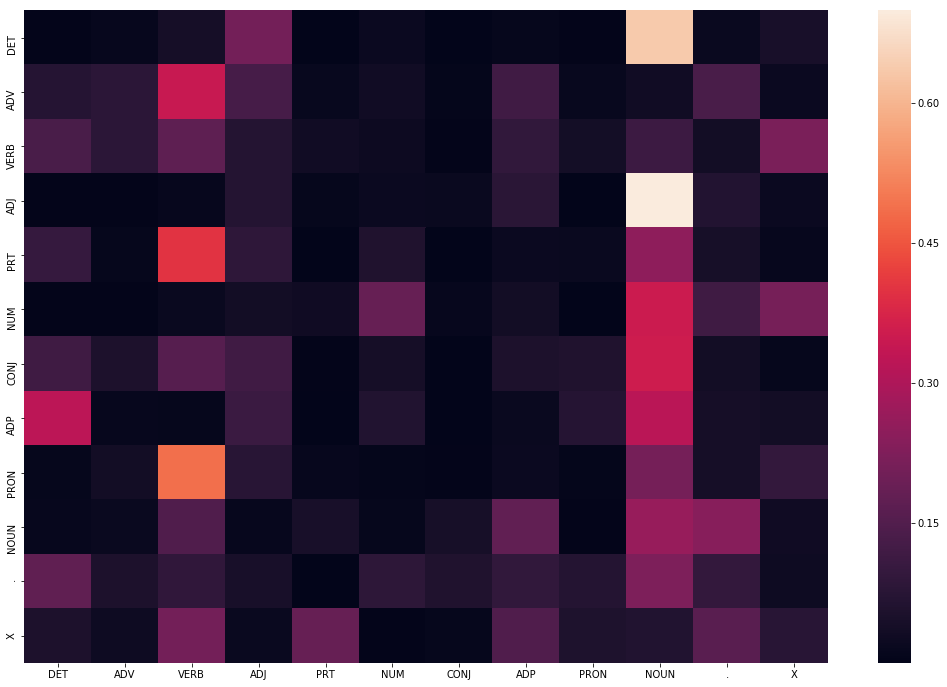

In [26]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

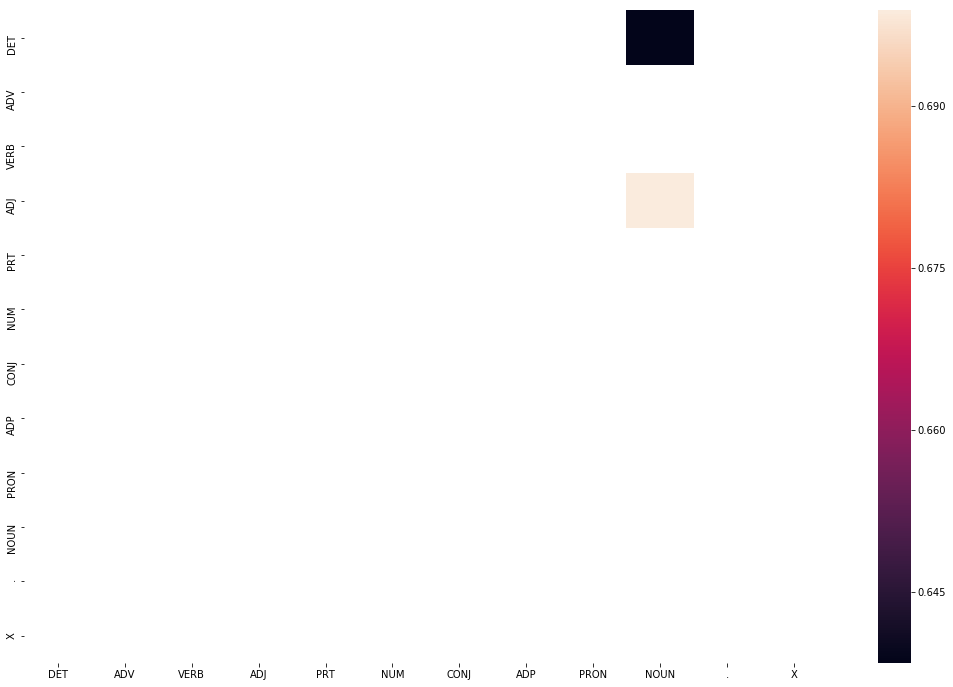

In [27]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

### Viterbi Algorithm

In [28]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = (word_given_tag(words[key], tag)[0])/(word_given_tag(words[key], tag)[1])
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))



####  Evaluating on Test Set

In [29]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

random.seed(123445)
print(len(test_set))
# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]
# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run[:10]

196


[[('The', 'DET'),
  ('National', 'NOUN'),
  ('Association', 'NOUN'),
  ('of', 'ADP'),
  ('Manufacturers', 'NOUN'),
  ('settled', 'VERB'),
  ('on', 'ADP'),
  ('the', 'DET'),
  ('Hoosier', 'NOUN'),
  ('capital', 'NOUN'),
  ('of', 'ADP'),
  ('Indianapolis', 'NOUN'),
  ('for', 'ADP'),
  ('its', 'PRON'),
  ('fall', 'NOUN'),
  ('board', 'NOUN'),
  ('meeting', 'NOUN'),
  ('.', '.')],
 [('The', 'DET'),
  ('show', 'NOUN'),
  ('runs', 'VERB'),
  ('the', 'DET'),
  ('gamut', 'NOUN'),
  (',', '.'),
  ('from', 'ADP'),
  ('a', 'DET'),
  ('blender', 'NOUN'),
  ('to', 'PRT'),
  ('chairs', 'NOUN'),
  ('to', 'PRT'),
  ('a', 'DET'),
  ('model', 'NOUN'),
  ('of', 'ADP'),
  ('the', 'DET'),
  ('Citicorp', 'NOUN'),
  ('building', 'NOUN'),
  ('.', '.')],
 [('``', '.'),
  ('People', 'NOUN'),
  ('have', 'VERB'),
  ('grown', 'VERB'),
  ('tired', 'ADJ'),
  ('of', 'ADP'),
  ('these', 'DET'),
  ('ads', 'NOUN'),
  ('and', 'CONJ'),
  ('Coleman', 'NOUN'),
  ('has', 'VERB'),
  ('gotten', 'VERB'),
  ('the', 'DET'),
  ('s

In [30]:
# tagging the test sentences
tagged_seq = Viterbi(test_tagged_words)

In [31]:
tagged_seq[:10]

[('The', 'DET'),
 ('National', 'NOUN'),
 ('Association', 'NOUN'),
 ('of', 'ADP'),
 ('Manufacturers', 'NOUN'),
 ('settled', 'VERB'),
 ('on', 'ADP'),
 ('the', 'DET'),
 ('Hoosier', 'DET'),
 ('capital', 'NOUN')]

In [32]:
def Accuracy(tagged_seq, test_run_base):
    # accuracy
    check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
    return (len(check)/len(tagged_seq))

In [33]:
acV= Accuracy(tagged_seq, test_run_base)*100;
print('Accuracy:',acV)

Accuracy: 88.42975206611571


In [34]:
# Incorrect tagged Word
incorrect_tagged_cases = [j for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [35]:
len(incorrect_tagged_cases)

14

In [36]:
incorrect_tagged_cases

[(('Hoosier', 'DET'), ('Hoosier', 'NOUN')),
 (('fall', 'VERB'), ('fall', 'NOUN')),
 (('gamut', 'DET'), ('gamut', 'NOUN')),
 (('blender', 'DET'), ('blender', 'NOUN')),
 (('chairs', 'DET'), ('chairs', 'NOUN')),
 (('tired', 'DET'), ('tired', 'ADJ')),
 (('stigma', 'DET'), ('stigma', 'NOUN')),
 (('campaigner', 'DET'), ('campaigner', 'NOUN')),
 (('Rozell', 'DET'), ('Rozell', 'NOUN')),
 (('Muzzling', 'DET'), ('Muzzling', 'ADJ')),
 (('blindfold', 'DET'), ('blindfold', 'NOUN')),
 (('executive', 'NOUN'), ('executive', 'ADJ')),
 (('recommending', 'DET'), ('recommending', 'VERB')),
 (('responds', 'DET'), ('responds', 'VERB'))]

In [37]:
# Getting List of Wrong tagged Unknown Words
def Unknown_Word_Tag(incorrect_tagged_cases, Unknowns_words):
    return ( [j for j in incorrect_tagged_cases if j[0][0] in Unknowns_words])

In [38]:
unknown_word_tag = Unknown_Word_Tag(incorrect_tagged_cases, Unknowns_words)

In [39]:
unknown_word_tag

[(('Hoosier', 'DET'), ('Hoosier', 'NOUN')),
 (('gamut', 'DET'), ('gamut', 'NOUN')),
 (('blender', 'DET'), ('blender', 'NOUN')),
 (('chairs', 'DET'), ('chairs', 'NOUN')),
 (('tired', 'DET'), ('tired', 'ADJ')),
 (('stigma', 'DET'), ('stigma', 'NOUN')),
 (('campaigner', 'DET'), ('campaigner', 'NOUN')),
 (('Rozell', 'DET'), ('Rozell', 'NOUN')),
 (('Muzzling', 'DET'), ('Muzzling', 'ADJ')),
 (('blindfold', 'DET'), ('blindfold', 'NOUN')),
 (('recommending', 'DET'), ('recommending', 'VERB')),
 (('responds', 'DET'), ('responds', 'VERB'))]

In [40]:
len(unknown_word_tag)/len(incorrect_tagged_cases)*100

85.71428571428571

In [41]:
# So, We are get 85% wrong tagged word from Unknown word list

#### Run on Sample test words

In [42]:
Sample_test_tagged_words_seq  = Viterbi(sample_words)

In [44]:
known_sample_test_word = [word for word in Sample_test_tagged_words_seq if word[0] in tokens ]

In [45]:
known_sample_test_word[:10]

[('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('.', '.'),
 ('has', 'VERB'),
 ('been', 'VERB')]

In [46]:
Sample_test_tagged_words_seq[:5]

[('Android', 'DET'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN')]

### Solve the problem of unknown words

### 1. Using Rule based method for handling unknown word

In [47]:
# specify patterns for tagging
# example from the NLTK book
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense
    (r'.*es$', 'VERB'),               # 3rd singular present   
    (r'^[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'\*', 'X') , 
    (r'.*', 'NOUN')
]

In [48]:
# Rule based Tagger
def RuleBasedTag(words, patterns):
    regexp_tagger = nltk.RegexpTagger(patterns)
    return regexp_tagger.tag(words)

    

### Modified Viterbi Algorithm

In [49]:
# Viterbi Heuristic
def Adv_Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = (word_given_tag(words[key], tag)[0])/(word_given_tag(words[key], tag)[1])
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        if word in Unknowns_words: 
            lword = []
            lword.append(word)
            t = RuleBasedTag(lword, patterns)[0][1]
            if t != None:
                state.append(t)
                continue
                    
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))


#### Evaluating tagging accuracy for Advance Viterbi with Rule based tagger

In [50]:
# tagging the test sentences
tagged_seq1 = Adv_Viterbi(test_tagged_words)

In [51]:
acAdvV= Accuracy(tagged_seq1, test_run_base)*100;
print('Accuracy:',acAdvV)

Accuracy: 95.86776859504133


In [52]:
# Incorrect tagged Word
incorrect_tagged_cases1 = [j for i, j in enumerate(zip(tagged_seq1, test_run_base)) if j[0]!=j[1]]

In [53]:
incorrect_tagged_cases1

[(('fall', 'VERB'), ('fall', 'NOUN')),
 (('tired', 'VERB'), ('tired', 'ADJ')),
 (('Muzzling', 'VERB'), ('Muzzling', 'ADJ')),
 (('executive', 'NOUN'), ('executive', 'ADJ')),
 (('responds', 'NOUN'), ('responds', 'VERB'))]

In [54]:
unknown_word_tag1 = Unknown_Word_Tag(incorrect_tagged_cases1, Unknowns_words)

In [55]:
len(unknown_word_tag1)/len(incorrect_tagged_cases1)*100

60.0

In [56]:
unknown_word_tag1

[(('tired', 'VERB'), ('tired', 'ADJ')),
 (('Muzzling', 'VERB'), ('Muzzling', 'ADJ')),
 (('responds', 'NOUN'), ('responds', 'VERB'))]

#### Run on Sample test words

In [57]:
Sample_test_tagged_words_seq1  = Adv_Viterbi(sample_words)

In [58]:
known_sample_test_word1 = [word for word in Sample_test_tagged_words_seq1 if word[0] in tokens ]

In [59]:
known_sample_test_word1[:10]

[('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('.', '.'),
 ('has', 'VERB'),
 ('been', 'VERB')]

In [60]:
Sample_test_tagged_words_seq1[:5]

[('Android', 'DET'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN')]

### 2. Viterbi modified using Rule based and probablity for handling unknown word 


In [61]:
# specify patterns for tagging
# example from the NLTK book
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense
    (r'.*es$', 'VERB'),               # 3rd singular present   
    (r'^[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'\*', 'X') , 
  
]

In [106]:
# Viterbi Algorithm
def Adv_Prob_viterbi(words, train_bag = train_tagged_words ):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = (word_given_tag(words[key], tag)[0])/(word_given_tag(words[key], tag)[1]) or 0.0001
            state_probability = emission_p * transition_p   
            if word in Unknowns_words: 
                p.append(transition_p)
            else:   
                p.append(state_probability)
        pmax = max(p)   
        if word in Unknowns_words: 
            lword = []
            lword.append(word)
            t = RuleBasedTag(lword, patterns)[0][1]
            if t != None:
                state.append(t)
                continue
                    
        
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

#### Evaluating tagging accuracy for Advance Viterbi with Rule based tagger with Emission Prob. smoothing

In [107]:
# tagging the test sentences
tagged_seq2 = Adv_Prob_viterbi(test_tagged_words)

In [108]:
acAdvProbV= Accuracy(tagged_seq2, test_run_base)*100;
print('Accuracy:',acAdvProbV)

Accuracy: 90.9090909090909


In [109]:
# Incorrect tagged Word
incorrect_tagged_cases2 = [j for i, j in enumerate(zip(tagged_seq2, test_run_base)) if j[0]!=j[1]]

In [110]:
incorrect_tagged_cases2

[(('Manufacturers', 'DET'), ('Manufacturers', 'NOUN')),
 (('settled', 'NOUN'), ('settled', 'VERB')),
 (('fall', 'VERB'), ('fall', 'NOUN')),
 (('chairs', 'VERB'), ('chairs', 'NOUN')),
 (('tired', 'VERB'), ('tired', 'ADJ')),
 (('Mark', 'VERB'), ('Mark', 'NOUN')),
 (('Rozell', 'X'), ('Rozell', 'NOUN')),
 (('Muzzling', 'VERB'), ('Muzzling', 'ADJ')),
 (('provisions', 'X'), ('provisions', 'NOUN')),
 (('executive', 'NOUN'), ('executive', 'ADJ')),
 (('Arbitrage', 'DET'), ('Arbitrage', 'NOUN'))]

In [111]:
unknown_word_tag2 = Unknown_Word_Tag(incorrect_tagged_cases2, Unknowns_words)

In [112]:
len(unknown_word_tag2)/len(incorrect_tagged_cases2)*100

36.36363636363637

In [113]:
unknown_word_tag2

[(('chairs', 'VERB'), ('chairs', 'NOUN')),
 (('tired', 'VERB'), ('tired', 'ADJ')),
 (('Rozell', 'X'), ('Rozell', 'NOUN')),
 (('Muzzling', 'VERB'), ('Muzzling', 'ADJ'))]

#### Run on Sample test words

In [114]:
Sample_test_tagged_words_seq2  = Adv_Prob_viterbi (sample_words)

In [115]:
known_sample_test_word2 = [word for word in Sample_test_tagged_words_seq2 if word[0] in tokens ]

In [116]:
known_sample_test_word2[:10]

[('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN'),
 ('system', 'NOUN'),
 ('developed', 'VERB'),
 ('by', 'ADP'),
 ('.', '.'),
 ('has', 'VERB'),
 ('been', 'VERB')]

In [117]:
Sample_test_tagged_words_seq2[:5]

[('Android', 'NOUN'),
 ('is', 'VERB'),
 ('a', 'DET'),
 ('mobile', 'ADJ'),
 ('operating', 'NOUN')]

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

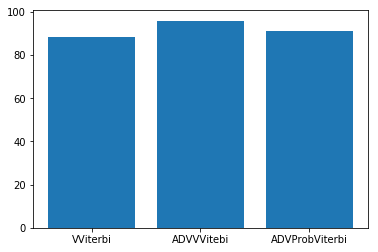

In [118]:
x = np.arange(3)
accuracy = [acV, acAdvV, acAdvProbV]
plt.bar(x, accuracy)
plt.xticks(x, ('VViterbi', 'ADVVVitebi', 'ADVProbViterbi'))
plt.show()

In [119]:
# Accuracy
print('Vanilla Viterbi :', acV)
print('1st Modified Vanilla Viterbi :', acAdvV)
print('2nd Modified Vanilla Viterbi :', acAdvProbV)

Vanilla Viterbi : 88.42975206611571
1st Modified Vanilla Viterbi : 95.86776859504133
2nd Modified Vanilla Viterbi : 90.9090909090909


#### It's looks likes Venilla Viterbi with Rule based tagging for unknown word is good with 96% Accuracy.
### Final Model Venilla Viterbi with Rule based tagging

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

#### Tagger Test set Comparsion 

In [120]:
# Correct tagging after 1st Viterbi Modification
Corrected_tag1 = [j for j in incorrect_tagged_cases if j[1] in tagged_seq1]
print('Total Incorrect Tagged Case:', len(incorrect_tagged_cases))
print('Corrected Tagged Case:',len(Corrected_tag1))
Corrected_tag1

Total Incorrect Tagged Case: 14
Corrected Tagged Case: 9


[(('Hoosier', 'DET'), ('Hoosier', 'NOUN')),
 (('gamut', 'DET'), ('gamut', 'NOUN')),
 (('blender', 'DET'), ('blender', 'NOUN')),
 (('chairs', 'DET'), ('chairs', 'NOUN')),
 (('stigma', 'DET'), ('stigma', 'NOUN')),
 (('campaigner', 'DET'), ('campaigner', 'NOUN')),
 (('Rozell', 'DET'), ('Rozell', 'NOUN')),
 (('blindfold', 'DET'), ('blindfold', 'NOUN')),
 (('recommending', 'DET'), ('recommending', 'VERB'))]

In [121]:
# Correct tagging after 2nd Viterbi Modification
Corrected_tag2 = [j for j in incorrect_tagged_cases if j[1] in tagged_seq2]
print('Total Incorrect Tagged Case:', len(incorrect_tagged_cases))
print('Corrected Tagged Case:',len(Corrected_tag2))
Corrected_tag2

Total Incorrect Tagged Case: 14
Corrected Tagged Case: 8


[(('Hoosier', 'DET'), ('Hoosier', 'NOUN')),
 (('gamut', 'DET'), ('gamut', 'NOUN')),
 (('blender', 'DET'), ('blender', 'NOUN')),
 (('stigma', 'DET'), ('stigma', 'NOUN')),
 (('campaigner', 'DET'), ('campaigner', 'NOUN')),
 (('blindfold', 'DET'), ('blindfold', 'NOUN')),
 (('recommending', 'DET'), ('recommending', 'VERB')),
 (('responds', 'DET'), ('responds', 'VERB'))]

### Sample test Word tagging comparison 

In [150]:
dfV = pd.DataFrame(Sample_test_tagged_words_seq,columns=['word','vvitrbi_tag'])
dfAdvV = pd.DataFrame(Sample_test_tagged_words_seq1,columns=['word','Adv_vitrbi_tag'])
dfProbAdvV = pd.DataFrame(Sample_test_tagged_words_seq2,columns=['word','Adv_prob_vitrbi_tag'])

In [151]:
df= pd.merge(dfV,dfAdvV,on='word')

In [152]:

df =  pd.merge(df, dfProbAdvV, on='word') 

In [153]:
# Using 1st Viterbi Modification
df[df['vvitrbi_tag']!=df['Adv_vitrbi_tag'] ]

,word,vvitrbi_tag,Adv_vitrbi_tag,Adv_prob_vitrbi_tag


In [155]:
# Using 2nd Viterbi Modification
df [df['vvitrbi_tag']!=df['Adv_prob_vitrbi_tag']]

,word,vvitrbi_tag,Adv_vitrbi_tag,Adv_prob_vitrbi_tag
0,Android,DET,DET,NOUN
1,Android,DET,DET,NOUN
2,Android,DET,DET,NOUN
3,Android,DET,DET,NOUN
4,Android,DET,DET,NOUN
5,Android,DET,DET,NOUN
6,Android,DET,DET,NOUN
7,Android,DET,DET,NOUN
142,Google,DET,DET,NOUN
143,Google,DET,DET,NOUN
